| Date                |   Copper |   Aluminum |   Zinc |   Lead |   Tin |   Oil Futures |
|:--------------------|---------:|-----------:|-------:|-------:|------:|--------------:|
| 2010-01-01 00:00:00 |     7375 |       2230 |   2560 | 2432   | 16950 |         79.36 |
| 2010-01-04 00:00:00 |     7500 |       2267 |   2574 | 2515   | 17450 |         81.51 |
| 2010-01-05 00:00:00 |     7485 |       2302 |   2575 | 2522.5 | 17375 |         81.77 |
| 2010-01-06 00:00:00 |     7660 |       2377 |   2718 | 2680   | 17825 |         83.18 |
| 2010-01-07 00:00:00 |     7535 |       2310 |   2607 | 2599   | 17475 |         82.66 |
| Date                |   Copper |   Aluminum |   Zinc |   Lead |   Tin |   Oil Futures |
|:--------------------|---------:|-----------:|-------:|-------:|------:|--------------:|
| 2021-01-01 00:00:00 |     7766 |     1979.5 |   2751 |   1994 | 20325 |         48.52 |
| Date                |   Copper |   Aluminum |   Zinc |   Lead |   Tin |   Oil Futures |
|:--------

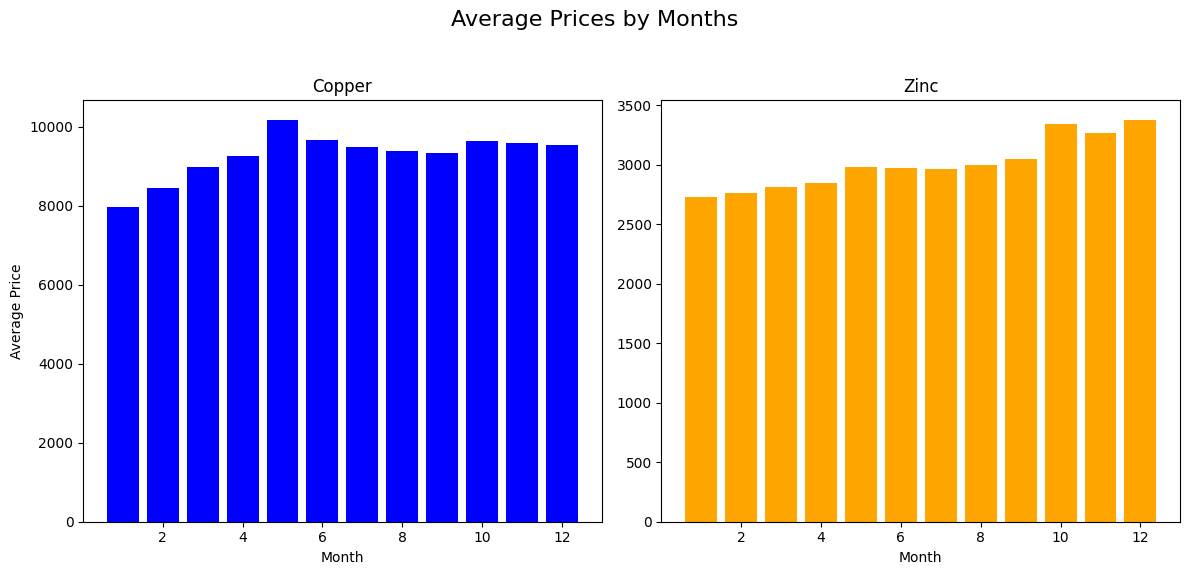

In [30]:
%run "/Users/rayannitcheu/Documents/GitHub/OilDesk-Intern-Assessment/solutions/exercice_2.ipynb"

# Note on this section

The goal of this section is to check that the CRUD operations defined in exercice 3 work as expected.

In [31]:
import datetime

## Illustration of CRUD operations


In [32]:
# Creating a mock df to test that the CRUD operations are working
mock_data = clean_data.copy()
mock_data.columns = [f"{c}1" for c in clean_data.columns]
pretty_print(mock_data.head())

| Date                |   Copper1 |   Aluminum1 |   Zinc1 |   Lead1 |   Tin1 |   Oil Futures1 |
|:--------------------|----------:|------------:|--------:|--------:|-------:|---------------:|
| 2010-01-01 00:00:00 |      7375 |        2230 |    2560 |  2432   |  16950 |          79.36 |
| 2010-01-04 00:00:00 |      7500 |        2267 |    2574 |  2515   |  17450 |          81.51 |
| 2010-01-05 00:00:00 |      7485 |        2302 |    2575 |  2522.5 |  17375 |          81.77 |
| 2010-01-06 00:00:00 |      7660 |        2377 |    2718 |  2680   |  17825 |          83.18 |
| 2010-01-07 00:00:00 |      7535 |        2310 |    2607 |  2599   |  17475 |          82.66 |


In [33]:
# Converting the df in a format ready to upload to the db
sql_data = convert_df_to_sql(mock_data, "Price")

In [34]:
pretty_print(sql_data)

| Date                | Commodity    |    Price |
|:--------------------|:-------------|---------:|
| 2010-01-01 00:00:00 | Copper1      |  7375    |
| 2010-01-04 00:00:00 | Copper1      |  7500    |
| 2010-01-05 00:00:00 | Copper1      |  7485    |
| 2010-01-06 00:00:00 | Copper1      |  7660    |
| 2010-01-07 00:00:00 | Copper1      |  7535    |
| 2010-01-08 00:00:00 | Copper1      |  7461    |
| 2010-01-11 00:00:00 | Copper1      |  7567.5  |
| 2010-01-12 00:00:00 | Copper1      |  7455    |
| 2010-01-13 00:00:00 | Copper1      |  7485    |
| 2010-01-14 00:00:00 | Copper1      |  7490    |
| 2010-01-15 00:00:00 | Copper1      |  7430    |
| 2010-01-18 00:00:00 | Copper1      |  7500    |
| 2010-01-19 00:00:00 | Copper1      |  7545    |
| 2010-01-20 00:00:00 | Copper1      |  7375    |
| 2010-01-21 00:00:00 | Copper1      |  7275    |
| 2010-01-22 00:00:00 | Copper1      |  7390    |
| 2010-01-25 00:00:00 | Copper1      |  7465    |
| 2010-01-26 00:00:00 | Copper1      |  7381    |


In [35]:
# Creating the entries in the table
create_price(sql_data)

2024-10-04 20:11:29,382 - INFO - Executing create_price
2024-10-04 20:11:29,939 - INFO - Successfully executed create_price in 0.5568 seconds


In [36]:
# Reading the created entries
pretty_print(read_prices(["Zinc1"]).head())

2024-10-04 20:11:29,942 - INFO - Executing read_prices
2024-10-04 20:11:30,036 - INFO - Successfully executed read_prices in 0.0937 seconds


| date       |   Zinc1 |
|:-----------|--------:|
| 2010-01-01 |    2560 |
| 2010-01-04 |    2574 |
| 2010-01-05 |    2575 |
| 2010-01-06 |    2718 |
| 2010-01-07 |    2607 |


In [37]:
# Changing the value of the first data
data_to_update = {
    "Date": datetime.date(2010, 1, 1),
    "Commodity": "Zinc1",
    "Price": 0
}
update_price(data_to_update)
read_prices(commodities="Zinc1", dates=datetime.date(2010, 1, 1), format="pandas")

2024-10-04 20:11:30,039 - INFO - Executing update_price
2024-10-04 20:11:30,045 - INFO - Successfully executed update_price in 0.0053 seconds
2024-10-04 20:11:30,046 - INFO - Executing read_prices
2024-10-04 20:11:30,050 - INFO - Successfully executed read_prices in 0.0042 seconds


,Zinc1
date,
2010-01-01,0.0


In [38]:
# Deleting the price from the table
delete_price(datetime.date(2010, 1, 1), "Zinc1")

2024-10-04 20:11:30,054 - INFO - Executing delete_price
2024-10-04 20:11:30,060 - INFO - Successfully executed delete_price in 0.0061 seconds


In [39]:
# Checking if the data is still present in the table
read_prices(commodities="Zinc1", dates=datetime.date(2010, 1, 1), format="pandas")

2024-10-04 20:11:30,064 - INFO - Executing read_prices
2024-10-04 20:11:30,068 - ERROR - Error in read_prices after 0.0037 seconds: 'date'


KeyError: 'date'

The error was expected as we deleted the price before.